C:\Users\DURGA PRASAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


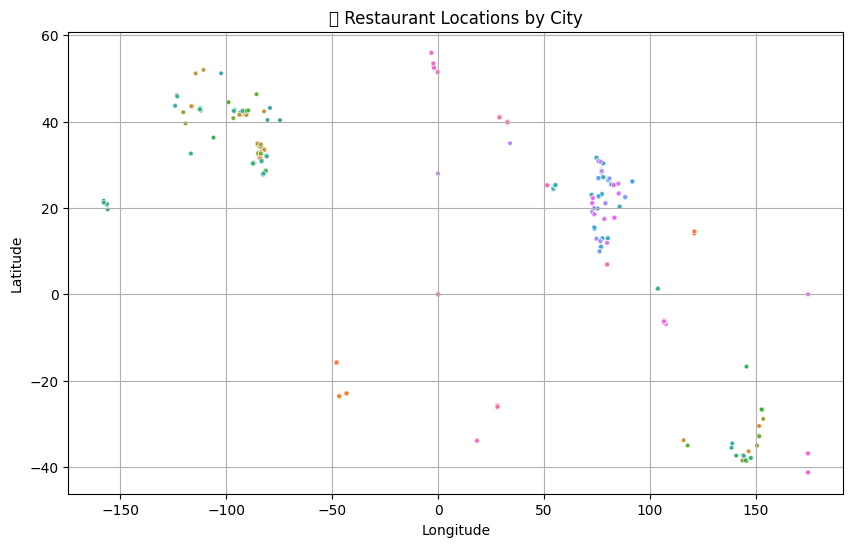

🌍 Interactive map saved as 'restaurant_map.html'


C:\Users\DURGA PRASAD\AppData\Local\Temp\ipykernel_2216\2069045666.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')


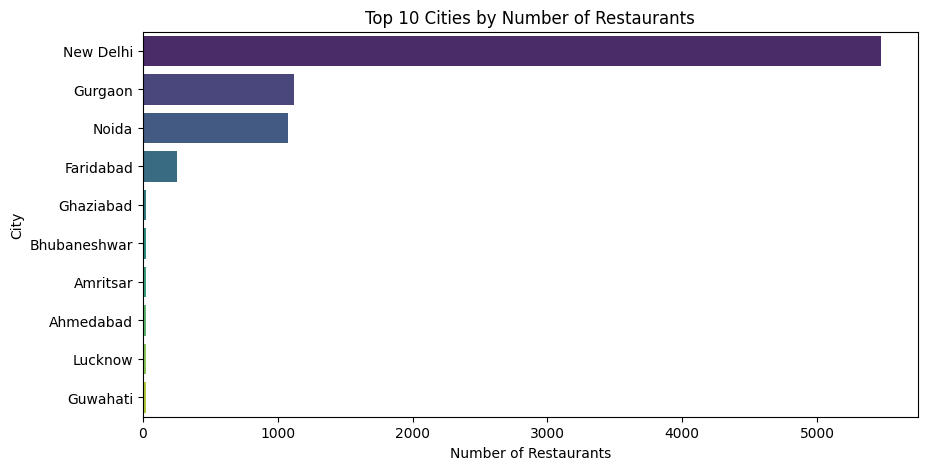


📊 Average Stats by City:
              Aggregate rating  Price range  Average Cost for two  \
City                                                                
New Delhi             2.438845     1.621597            596.088069   
Gurgaon               2.651431     1.855993            714.016100   
Noida                 2.036204     1.601852            539.490741   
Faridabad             1.866932     1.454183            447.609562   
Ghaziabad             2.852000     1.800000            602.000000   
Bhubaneshwar          3.980952     1.857143            678.571429   
Lucknow               4.195238     2.571429            859.523810   
Amritsar              3.685714     1.809524            480.952381   
Ahmedabad             4.161905     2.571429            857.142857   
Guwahati              4.190476     2.523810            821.428571   

              Restaurant Count  
City                            
New Delhi                 5473  
Gurgaon                   1118  
Noida        

C:\Users\DURGA PRASAD\AppData\Local\Temp\ipykernel_2216\2069045666.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_high_rated.values, y=top_high_rated.index, palette='coolwarm')


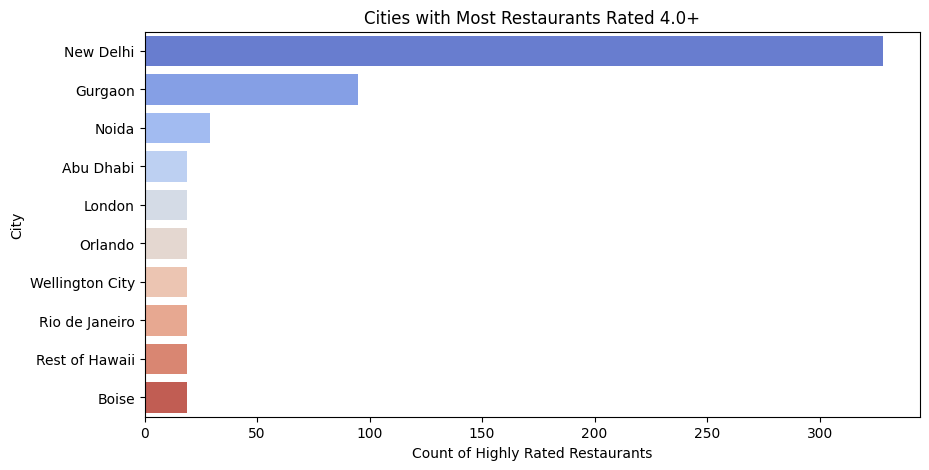

In [1]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# 2. Load dataset
df = pd.read_csv("Dataset .csv")

# 3. Basic cleanup: Drop rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# 4. Visualize distribution of restaurants by coordinates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='City', legend=False, s=10)
plt.title('📍 Restaurant Locations by City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# 5. Create interactive map using Folium
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()

map_restaurants = folium.Map(location=[center_lat, center_lon], zoom_start=4)
marker_cluster = MarkerCluster().add_to(map_restaurants)

for i, row in df.iterrows():
    popup_text = f"{row['Restaurant Name']}<br>City: {row['City']}<br>Cuisine: {row['Cuisines']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
    ).add_to(marker_cluster)

# Save the interactive map to HTML
map_restaurants.save("restaurant_map.html")
print("🌍 Interactive map saved as 'restaurant_map.html'")

# 6. Group by City: restaurant count
city_counts = df['City'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

# 7. Group by City: Average Rating and Price
city_stats = df.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Price range': 'mean',
    'Average Cost for two': 'mean',
    'Restaurant Name': 'count'
}).rename(columns={'Restaurant Name': 'Restaurant Count'})

print("\n📊 Average Stats by City:")
print(city_stats.sort_values('Restaurant Count', ascending=False).head(10))

# 8. Identify Top Cities by High Rated Restaurants
high_rated = df[df['Aggregate rating'] >= 4.0]
top_high_rated = high_rated['City'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_high_rated.values, y=top_high_rated.index, palette='coolwarm')
plt.title('Cities with Most Restaurants Rated 4.0+')
plt.xlabel('Count of Highly Rated Restaurants')
plt.ylabel('City')
plt.show()
